Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart Kernel) and then **run all cells** (in the menubar, select Run$\rightarrow$Run All Cells). Alternatively, you can use the **validate** button in the assignment list panel.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". When you insert your Code you can remove the line `raise NotImplementedError()`. Also put your name, matriculationnumber, and collaborators below:

In [ ]:
NAME = "Li Xinghan"
MATRICULATIONNUMBER = "5130032"
COLLABORATORS = ""

---

<img src="images/logo_ifn.svg" alt="Drawing" style="width: 256px;" align="right"/>

# Exercise 1.3: Arrays and Math

When working with machine learning models, we will often times work with high-dimensional data structures. The input to many machine learning models is for example a feature vector (1D). When working with gray scale images we are working with a matrix (2D) where each entry corresponds to a gray value. A color image additionally contains three color channels, which makes the data structure three-dimensional (3D). There are also many examples for even higher-dimensional structures, which makes accurate handling of these structures an essential skill for practical deep learning development. In this part, we will explore many commonly used array manipulation techniques. For this purpose most often the library numpy is used.

In [1]:
import os
import sys
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import params
from ipylab import JupyterFrontEnd
PARAM_1, PARAM_2, PARAM_3 = params.gen_params(os.getcwd())
app = JupyterFrontEnd()
app.commands.execute('notebook:render-all-markdown')

### Task 1.3-A: Creating Numpy Arrays (5P)

The numpy library is designed for dealing with structured high-dimensional data, i.e., arrays. The main data structure this library works on is the numpy array. There are various possibilities to create numpy arrays. Try a few of them out:
- Create an array `zero_array` containing only zeros with shape ({{PARAM_1}}, {{PARAM_3}})
- Arrays can also be created, e.g., from a list. Create a list `int_list` containing all integer numbers from 0 to (including) {{PARAM_2}} in increasing order and convert it to a numpy array `int_array`. 
- Numpy also supplies functionalities to achieve something similar (e.g. `np.arange()`). Create a numpy array `uni_array` with values in the range $[$0, {{PARAM_3}}$]$ with a spacing of 0.2
- Create a 2D array `pos_array` with dimensions {{PARAM_1}}, {{PARAM_3}} where the value of each position is equal to it's position in the second dimension (starting from 0 for the first entry)

In [10]:
# YOUR CODE HERE
zero_array = np.zeros((18,46))
int_list =list(range(68))
int_array=np.array(int_list)

uni_array = np.arange(0,46.2,0.2)
pos_array = np.arange(46).reshape(1,-1)

In [ ]:
assert type(zero_array) == np.ndarray
assert type(int_array) == np.ndarray
assert type(uni_array) == np.ndarray
assert type(pos_array) == np.ndarray


### Task 1.3-B: Loading Images to Numpy (5P)

An often used application of numpy arrays is to store image data. Images are usually stored in png or jpeg format. Libraries such as opencv can load these files and convert them to a numpy array, which can be used for further processing. Other libraries also exist, e.g., PIL, imagio, and many others. For now we will use opencv (imported as `cv2`) as it naturally uses the numpy data format. Please solve the following tasks:
- load the image stored under 'data/street_image.png' in it's original format (uint8) and save it as `image`. If everything works correct the image should contain uint8 values between 0 and 255. Also obtain the image's shape as `im_shape` and the image's type as `im_type`.
- Complete the function `normalize_image` which should normalize the image to the range \[0,1\]. Cast the image to float32 before normalization.
- Complete the function `zero_image` which implements a zero-mean unit-variance normalization (channel-independent). Specifically, subtract the array mean from each element and devide the result by the array standard deviation. Do not apply per-channel normalization and cast the image to float32 before normalization.
- \[UNGRADED\]: To check if you implemented some of the functions correctly you can use matplotlib.pyplot (imported as plt) and plot the resulting image. An example code is given below.


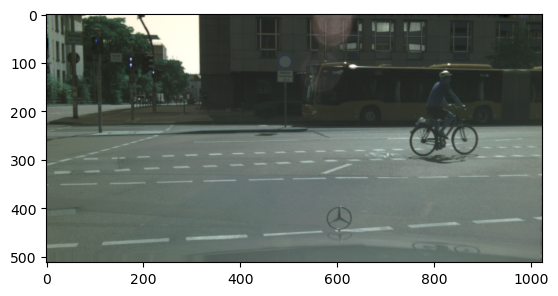

In [24]:
def load_image(path):
    # YOUR CODE HERE
    image = cv2.imread(path,cv2.IMREAD_UNCHANGED)
    im_type = image.dtype
    im_shape = image.shape
    return image, im_type, im_shape

def normalize_image(image):
    # YOUR CODE HERE
    normal_image = image.astype(np.float32)/255.0
    return normal_image

def zero_mean(image):
    # YOUR CODE HERE
    mean = np.mean(image)
    std = np.std(image)
    zero_image = (image.astype(np.float32)-mean)/std
    return zero_image  

fig, ax = plt.subplots()
ax.imshow(load_image('data/street_image.png')[0])
plt.show()

In [ ]:
raw_image, im_type, im_shape = load_image("data/street_image.png")
assert type(raw_image) == np.ndarray

norm_image = normalize_image(raw_image)
zero_image = zero_mean(raw_image)


### Task 1.3-C: Iterating, Slicing, and Math (5P)

Often times we need to manipulate arrays for the task at hand. Important operations that you should know about are iterating over arrays (or better: make smart use of numpy functions), slicing, and math. Please note that for loops are very very slow in python such that you should try to avoid them at all cost when working with numpy arrays. With this in mind complete the following tasks assuming a 2D array of arbitrary shape as input:
- Iterate over the first array dimension and calculate the mean of each vector from the second dimension. The output should be a 1D numpy array which is returned as `mean_array`.
- Use array slicing to only return the array elements 3 and 4 (starting from 0) in the first dimension, while every second value is returned in the second dimension. The output should again be a 2D array of reduced size, which is returned as `sliced_array`.
- Implement the element-wise sigmoid function using only numpy functions and return the output as `sigmoid_array`


In [18]:
def manipulate_array(in_array):
    # YOUR CODE HERE
    mean_array = np.mean(in_array,axis = 1)
    sliced_array=in_array[3:5,::2]
    sigmoid_array = 1/(1+np.exp(-in_array))
    return mean_array, sliced_array, sigmoid_array

In [ ]:
test_array = np.random.uniform(size=(200,200))
outputs = manipulate_array(test_array)

for out in outputs:
    assert type(out) == np.ndarray


### Task 1.3-D: Spatial Image Manipulation (5P)

In the following, we will learn how to implement common image manipualtions. These manipulations are often used to artificially increase the amount of data, i.e., data augmentations. As we are using an image, you can use matplotlib (as shown in the above example) to at least qualitatively verify that your code works correct. Please implement the following:
- horizontal flipping
- vertical flipping
- center cropping to a shape of ({{int((PARAM_2 + PARAM_1 + 2)/2)*2}}, {{int((PARAM_3 + 2)/2)*2}}). Assume that the input image is larger than that shape and that it contains an even number of elements in each dimension.
- rotation by 90 degrees in clockwise direction. Assume that the input is quadratic.

In [26]:
def hor_flip(img):
    # YOUR CODE HERE
    flip_img = np.fliplr(img)
    return flip_img

def ver_flip(img):
    # YOUR CODE HERE
    flip_img = np.flipud(img)
    return flip_img

def center_crop(img):
    # YOUR CODE HERE
    height,width =img.shape[:2]
    height_start = (height -86)//2
    height_end = height_start +86
    width_start = (width - 48)//2
    width_end = width_start + 48
    crop_img = img[height_start:height_end,width_start:width_end]
    return crop_img

def rotate(img):
    # YOUR CODE HERE
    rot_img = np.rot90(img)
    return rot_img

In [ ]:
in_img = cv2.imread("data/street_image.png")
h_flip_img = hor_flip(in_img)
v_flip_img = ver_flip(in_img)
crop_img = center_crop(in_img)
rot_img = rotate(in_img)


### Task 1.3-E: Photometric Image Manipulation  (5P)

Similarly, there are several photometric manipulations which can be applied to numpy arrays, such as brightness or contrast manipulations. You can use the functionalities of opencv for the scope of this task. Be careful as the images are stored in uint8, so if you manipulate them, cast them to float32 values before processing and back to uint8 after processing. With this in mind, please implement the following:
- Implement a function `adj_brightness` that adjusts the image brightness by the parameter beta (assume a simple addition of `beta` to adjust the brightness).
- Implement a function `adj_contrast` that adjusts the image contrast by the parameter alpha (assume a simple mutliplication of `alpha` to adjust the contrast).
- Implement a function `adj_saturation` that adjusts the image saturation by the parameter gamma (assume a simple mutliplication of `gamma` on the saturation value in the HSV color space and that `gamma < 1`. Also, be careful to clip image values to the valid range before conversion to uint8.).

In [28]:
def adj_brightness(img, beta):
    # YOUR CODE HERE
    adj_img = np.clip(img.astype(np.float32)+beta,0,255).astype(np.uint8)
    return adj_img

def adj_contrast(img, alpha):
    # YOUR CODE HERE
    adj_img = np.clip((img.astype(np.float32)-127.5)*alpha+127.5,0,255).astype(np.uint8)
    return adj_img

def adj_saturation(img, gamma):
    # YOUR CODE HERE
    hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV).astype(np.float32)
    hsv_img[:,:,1]=np.clip(hsv_img[:,:,1]*gamma,0,255)
    adj_img = cv2.cvtColor(hsv_img.astype(np.uint8),cv2.COLOR_HSV2BGR)
    return adj_img

In [ ]:
in_img = cv2.imread("data/street_image.png")

bright_img = adj_brightness(in_img, 40)
contr_img = adj_contrast(in_img, 1.2)
sat_img = adj_saturation(in_img, 0.5)

assert bright_img.dtype == np.uint8
assert contr_img.dtype == np.uint8
assert sat_img.dtype == np.uint8


### Task 1.3-F: Filtering and Kernels (5P)

Finally, it is often useful to modify a pixel not only based on it's own value but also in dependence of a local neighbourhood. This can be achieved by filters (e.g., 3 x 3) which are centered around the considered pixel. Please implement the following:
- A Gaussian blurring filter that has a shape of 5 x 5 and contains values of 1/25 at every position. The filter is applied on each channel individually. Assume that the image is padded with zeros to retain the image shape.
- A Gradient filter to detect gradients along the width dimension. The filter has a 3 x 3 shape: \[\[-3, 0, 3\],\[-10, 0, 10\],\[-3, 0, 3\]\]. The filter is applied on each channel individually. Assume that the image is padded with zeros to retain the image shape.

In [29]:
def gaussian_filter(img):
    # YOUR CODE HERE
    kernel = np.array([[1, 4, 6, 4, 1],
                       [4, 16, 24, 16, 4],
                       [6, 24, 36, 24, 6],
                       [4, 16, 24, 16, 4],
                       [1, 4, 6, 4, 1]])/256.0
    adj_img = cv2.filter2D(img, -1, kernel)
    return adj_img

def gradient_filter(img):
    # YOUR CODE HERE
    kernel = np.array([[-3, 0, 3],
                       [-10, 0, 10],
                       [-3, 0, 3]])
    adj_img = cv2.filter2D(img,-1,kernel)
    return adj_img 


In [ ]:
in_img = cv2.imread("data/street_image.png")

gauss_img = gaussian_filter(in_img)
grad_img = gradient_filter(in_img)
